# Predict Loan Eligibility for Dream Housing Finance company

# Index

1. [Problem Statements](#Problem-Statements)
2. [Data Dictionary](#Data-Exploration)
3. [Evaluation Criteria](#Data-Preprocessing)
4. [Import Libraries](#Library-Loading)
5. [Data Loading](#Data-Loading)
6. [Data Preprocessing](#Data-Preprocessing)
   - 6.1 [Handling Missing Values](#Handling-Missing-Values)
   - 6.2 [Data Cleaning](#Data-Cleaning)
   - 6.3 [Feature Engineering](#Feature-Engineering)
7. [Exploratory Data Analysis](#Exploratory-Data)
 - 7.0 [Univariate Analysis](#Univariate-Analysis)
 - 7.1 [Descriptive Statistics](#Descriptive-Statistics)

 # PROBLEM STATEMENT


 # Dream Housing Finance Company

Dream Housing Finance company specializes in offering a variety of home loans and operates in urban, semi-urban, and rural areas. The loan application process involves customers applying for a home loan, followed by the company validating the customer's eligibility for the loan.

## Loan Eligibility Automation

The company aims to streamline and automate the loan eligibility process in real-time. This automation relies on the customer details provided during the online application form submission. The key parameters considered in this process include:

- **Gender**
- **Marital Status**
- **Education**
- **Number of Dependents**
- **Income**
- **Loan Amount**
- **Credit History**
- **Others**

By leveraging a dataset, the company seeks to identify customer segments that meet the eligibility criteria for the loan amount. This approach allows the company to specifically target and serve customers who qualify for the loan.

This automation not only enhances efficiency but also ensures a more responsive and personalized experience for customers seeking home loans from Dream Housing Finance Company.


# Data Dictionary

## Train File

| Variable            | Description                                      |
|---------------------|--------------------------------------------------|
| Loan_ID             | Unique Loan ID                                   |
| Gender              | Male/Female                                      |
| Married             | Applicant married (Y/N)                         |
| Dependents          | Number of dependents                            |
| Education           | Applicant Education (Graduate/Under Graduate)   |
| Self_Employed       | Self-employed (Y/N)                              |
| ApplicantIncome     | Applicant income                                |
| CoapplicantIncome   | Coapplicant income                              |
| LoanAmount          | Loan amount in thousands                        |
| Loan_Amount_Term    | Term of loan in months                           |
| Credit_History      | Credit history meets guidelines (1 - Yes, 0 - No)|
| Property_Area       | Urban/Semi Urban/Rural                           |
| Loan_Status         | (Target) Loan approved (Y/N)                    |


## Test File

| Variable            | Description                                      |
|---------------------|--------------------------------------------------|
| Loan_ID             | Unique Loan ID                                   |
| Gender              | Male/Female                                      |
| Married             | Applicant married (Y/N)                         |
| Dependents          | Number of dependents                            |
| Education           | Applicant Education (Graduate/Under Graduate)   |
| Self_Employed       | Self-employed (Y/N)                              |
| ApplicantIncome     | Applicant income                                |
| CoapplicantIncome   | Coapplicant income                              |
| LoanAmount          | Loan amount in thousands                        |
| Loan_Amount_Term    | Term of loan in months                           |
| Credit_History      | Credit history meets guidelines (1 - Yes, 0 - No)|
| Property_Area       | Urban/Semi Urban/Rural                           |


# Submission File Format

## Variable Descriptions

| Variable     | Description                          |
|--------------|--------------------------------------|
| Loan_ID      | Unique Loan ID                       |
| Loan_Status  | (Target) Loan approved (Y/N)         |


# Evaluation Metric

The performance of your model will be assessed based on its predictions of loan status for the test data (test.csv). The test dataset shares similar data points with the training dataset, with the exception of the loan status to be predicted.

## Submission Format

Your submission should follow the format outlined in the sample submission provided. It must include the unique Loan ID (`Loan_ID`) and the predicted loan status (`Loan_Status`) for each entry.

## Evaluation Criteria

The evaluation will be conducted using the Accuracy value. Accuracy is a measure of the correctness of your model's predictions, calculated as the ratio of correctly predicted insta


# IMPORT LIBRARIES

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# LOAD DATASETS

In [238]:
data=pd.read_csv("https://raw.githubusercontent.com/prashantsundge/BFSI/main/DATA/train_ctrUa4K.csv")

In [239]:
data.sample(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
480,LP002534,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
418,LP002345,Male,Yes,0,Graduate,No,1025,2773.0,112.0,360.0,1.0,Rural,Y
528,LP002714,Male,No,1,Not Graduate,No,2679,1302.0,94.0,360.0,1.0,Semiurban,Y


# DATA PREPROCSSING

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [241]:
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [242]:

# for i in data:
#   if(data[i].dtypes=='object'):
#     print(f'column name {i}  , Dtypes = {data[i].dtypes}')
#     if(data[i].nunique() < 6):

#       print(data[i].value_counts())
#       print(data[i].mode()[0])

#   else:
#     print(f'column name {i}  , Dtypes ={data[i].dtypes}')
#     print(int(data[i].mean()))



* Missing data present in most of the columns

## CREATE USERDEFINDED FUNCTION TO WORK ON DATA

In [243]:
def pre_process(df):
  df=df.drop('Loan_ID', axis=1)
  for i in df:
    if (df[i].dtypes == 'object'):
      if(df[i].nunique() < 6):
        df[i]=df[i].fillna(df[i].mode()[0])

    else:
      df[i]=df[i].fillna(int(df[i].mean()))
  print(df.isnull().sum())
  return df


In [244]:
new_data=pre_process(data)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [245]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### DATA INCONSISTANCY CHECK

In [246]:
def df_inconsistancy(df):
  for i in df:
    if (df[i].nunique() < 6):
      print("-"*50)
      print(df[i].value_counts())
    else:
      if(df[i].dtypes != 'object'):
          print("-"*50)
          print(f"{i} \t {df[i].mean()}")



In [247]:
df_inconsistancy(new_data)

--------------------------------------------------
Male      502
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
--------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
ApplicantIncome 	 5403.459283387622
--------------------------------------------------
CoapplicantIncome 	 1621.2457980271008
--------------------------------------------------
LoanAmount 	 146.3973941368078
--------------------------------------------------
Loan_Amount_Term 	 342.0
--------------------------------------------------
1.0    475
0.0    139
Name: Credit_History, dtype: int64


* No DUPLICATE VALUES FOUND IN DATASET

In [248]:
new_data.duplicated().sum()

0

# FEATURE ENGINEERING

In [249]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* From the Dataset we can say Feature engineering is not required

# Exploratory Data Analysis (EDA)

## DATASET DISTRIBUTION

In [250]:
new_data.skew()

<ipython-input-250-10a2831475e9>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

The dataset exhibits positive skewness in 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount', indicating right-skewed distributions with few extreme values. 'Loan_Amount_Term' and 'Credit_History' show negative skewness, suggesting left-skewed distributions with concentration towards higher values.

**Next Action Steps:**

- Consider applying appropriate transformations (e.g., log transformation) to address skewness in 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'.
- Evaluate the impact of transformations on the distribution shapes and explore potential improvements in data symmetry.


## UNIVARIATE ANALYSIS

## DESCRIPTIVE STATISTICS

In [251]:
new_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.397394,342.000000,0.773616
std,6109.041673,2926.248369,84.037503,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- AplicantIncome, coapplicantIncome , loanAmmount has outliers

In [252]:
# we can create continuous varible list and check the outeliers
cont_varaible=new_data.describe().columns
cont_varaible

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### We can find Outliers using BoXplot and Zscore Method

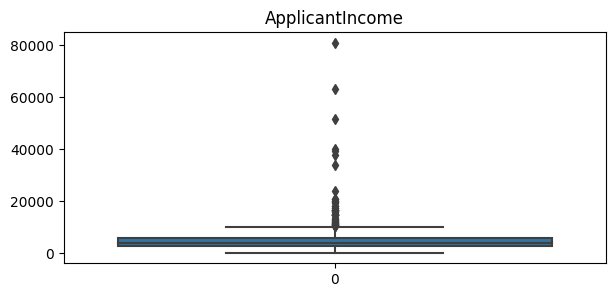

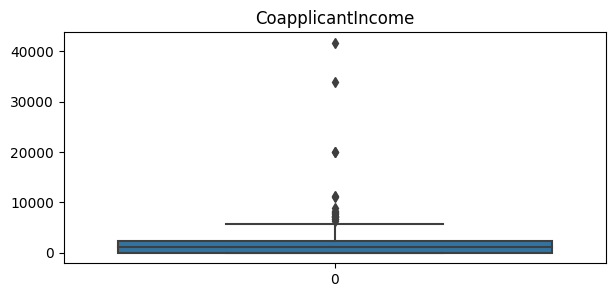

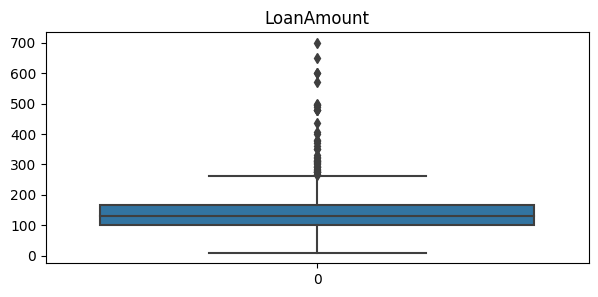

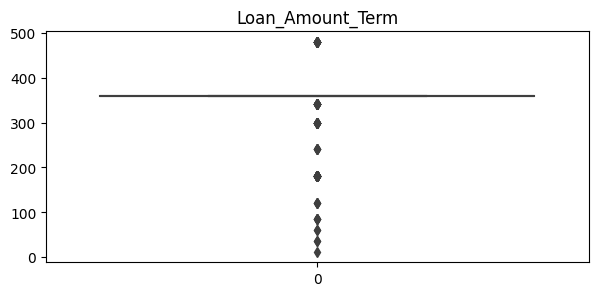

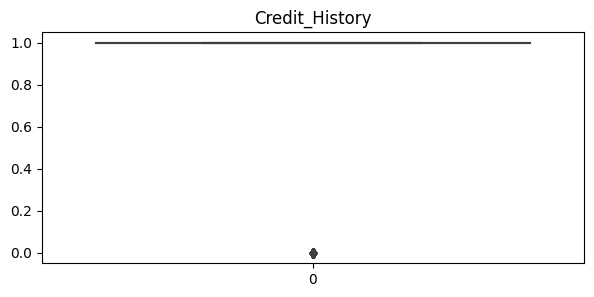

In [253]:
for i in new_data[cont_varaible]:
  plt.figure(figsize=(7,3))
  sns.boxplot(new_data[i])
  plt.title(i)
  plt.show()

### ZSCORE METHOD TO FIND OUTLIERS

In [254]:
from scipy.stats import zscore
z_score=zscore(new_data[cont_varaible])
outliers = np.where((z_score > 3 )|(z_score < -3 ))[0]

# Print indices and corresponding values
print("Indices and Values of Outliers:")
for index in outliers:
    value = new_data.iloc[index][cont_varaible]
    print(f"Index: {index}, Value: {value}")

Indices and Values of Outliers:
Index: 9, Value: ApplicantIncome        12841
CoapplicantIncome    10968.0
LoanAmount             349.0
Loan_Amount_Term       360.0
Credit_History           1.0
Name: 9, dtype: object
Index: 14, Value: ApplicantIncome        1299
CoapplicantIncome    1086.0
LoanAmount             17.0
Loan_Amount_Term      120.0
Credit_History          1.0
Name: 14, dtype: object
Index: 68, Value: ApplicantIncome       7100
CoapplicantIncome      0.0
LoanAmount           125.0
Loan_Amount_Term      60.0
Credit_History         1.0
Name: 68, dtype: object
Index: 94, Value: ApplicantIncome       3620
CoapplicantIncome      0.0
LoanAmount            25.0
Loan_Amount_Term     120.0
Credit_History         1.0
Name: 94, dtype: object
Index: 126, Value: ApplicantIncome      23803
CoapplicantIncome      0.0
LoanAmount           370.0
Loan_Amount_Term     360.0
Credit_History         1.0
Name: 126, dtype: object
Index: 130, Value: ApplicantIncome      20166
CoapplicantIncome     

### IQR METHOD

In [255]:
Q1=new_data[cont_varaible].quantile(0.25)
Q3= new_data[cont_varaible].quantile(0.75)
IQR= Q3-Q1
iqr_outliers=(new_data[cont_varaible] < (Q1 - 1.5 * IQR)) | (new_data[cont_varaible] > (Q3 + 1.5 * IQR))
for ind in iqr_outliers:
  print(new_data[cont_varaible][ind])

#outliers = (data['continuous_variable'] < (Q1 - 1.5 * IQR)) | (data['continuous_variable'] > (Q3 + 1.5 * IQR))

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64
0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64
0      146.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64
0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


- we are not making changes on outliers as we are keeping it as it is

# HISTOGRAMS

In [256]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


will check the dataset is balanced or not using distribution of LOAN STATUS

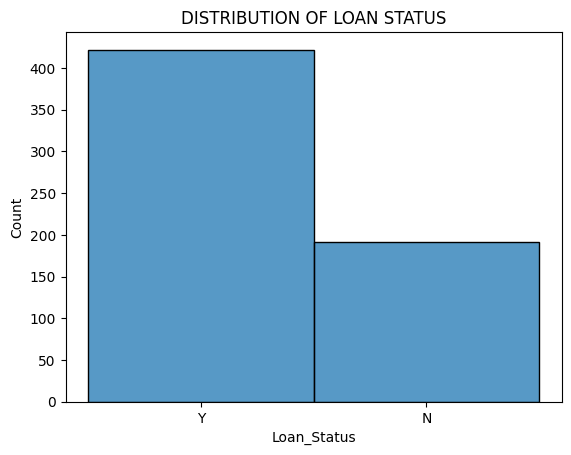

In [257]:

sns.histplot(new_data, x='Loan_Status')
plt.title('DISTRIBUTION OF LOAN STATUS')
plt.show()

We can see the DATA is not balaced Loan eligibility is high than loan rejection

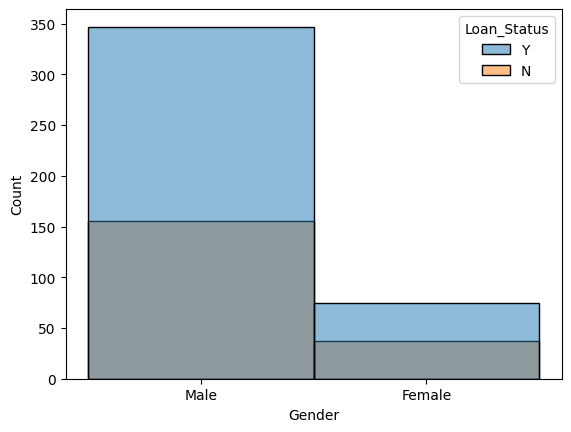

In [258]:
sns.histplot(new_data, x='Gender', hue='Loan_Status')
plt.show()

- more male has applied for loan and loan acceptance ration is same between make and female

### KDE KARNEL DENSITY PLOT

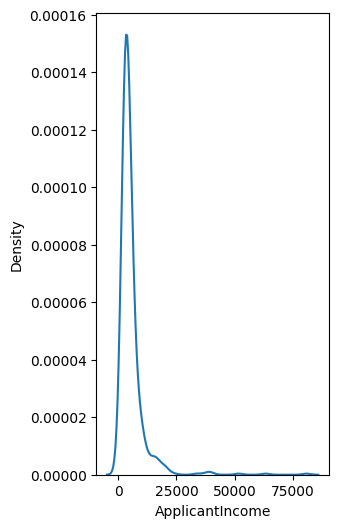

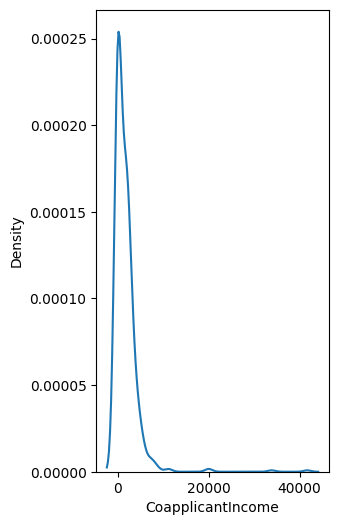

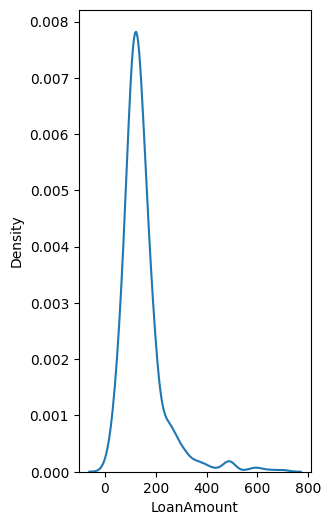

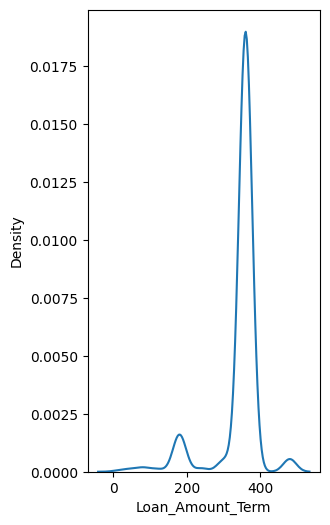

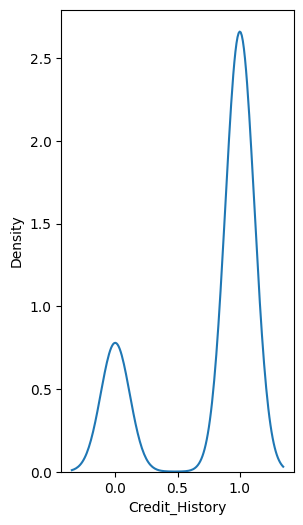

In [259]:
for i in new_data[cont_varaible]:
  plt.figure(figsize=(3,6))
  sns.kdeplot(new_data[cont_varaible][i])
  plt.show()


In [260]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# BAR PLOT

<Axes: xlabel='Married', ylabel='count'>

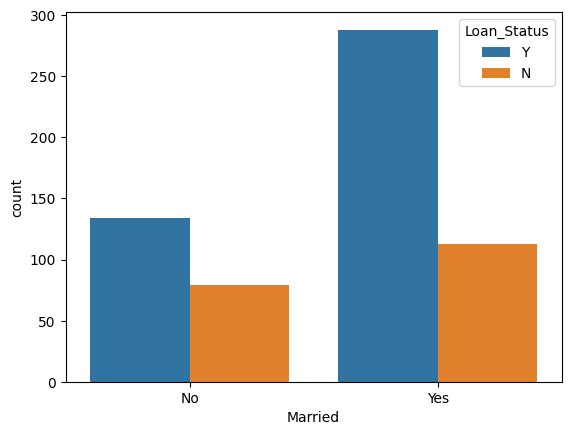

In [261]:
sns.countplot(data=new_data, x='Married', hue='Loan_Status' )

<Axes: xlabel='Self_Employed', ylabel='count'>

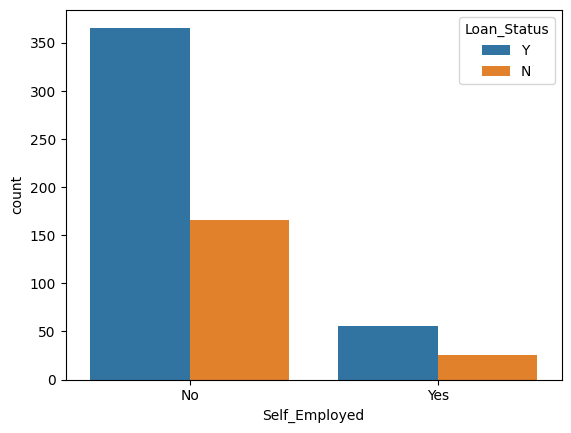

In [262]:
sns.countplot(data=new_data, x='Self_Employed', hue='Loan_Status' )

<Axes: xlabel='Property_Area', ylabel='count'>

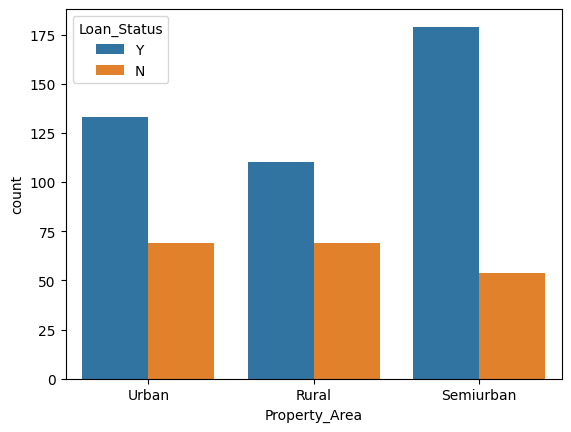

In [263]:
sns.countplot(data=new_data, x='Property_Area', hue='Loan_Status' )

<Axes: xlabel='Education', ylabel='count'>

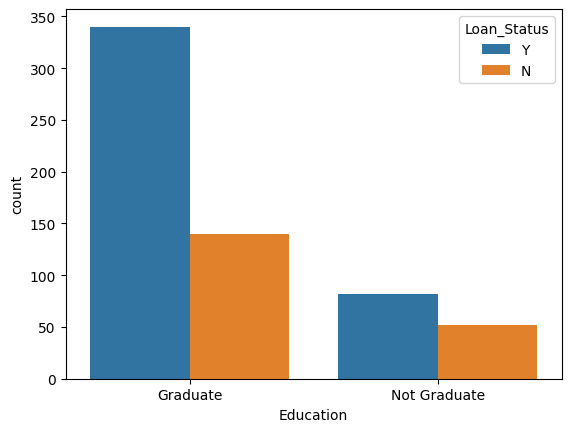

In [264]:
sns.countplot(data=new_data, x='Education', hue='Loan_Status' )

# BI VARIATE

### SCATTER PLOT

In [265]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

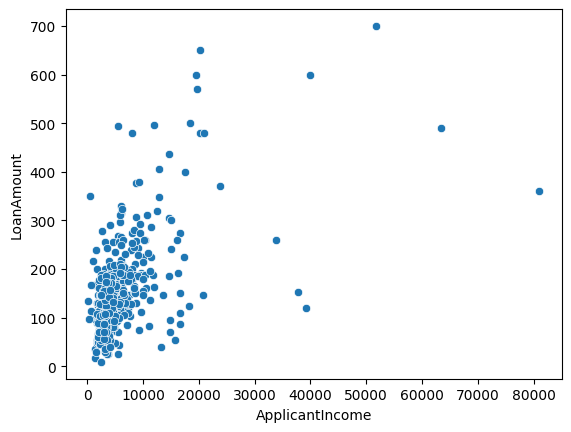

In [266]:
sns.scatterplot(new_data, x='ApplicantIncome', y='LoanAmount')

- we can see the corelation with Applicant incom and loan Amound

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

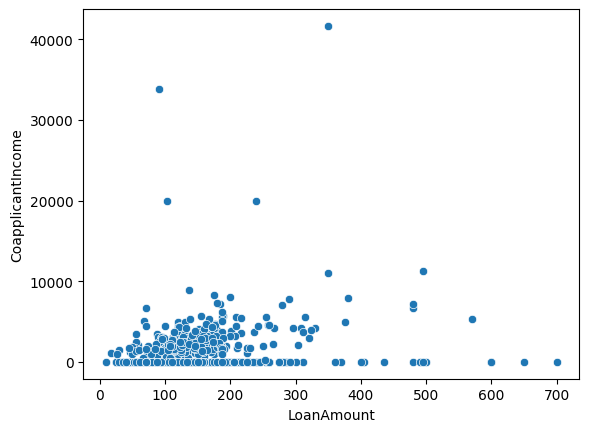

In [267]:
sns.scatterplot(new_data, x='LoanAmount', y='CoapplicantIncome')

## CORR

In [268]:
new_data.corr()

<ipython-input-268-0de3741be453>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565621,-0.045242,0.006986
CoapplicantIncome,-0.116605,1.000000,0.187863,-0.059675,-0.058795
LoanAmount,0.565621,0.187863,1.000000,0.038812,-0.034518
Loan_Amount_Term,-0.045242,-0.059675,0.038812,1.000000,0.005446
Credit_History,0.006986,-0.058795,-0.034518,0.005446,1.000000


## MULTIVARIATE

<ipython-input-269-0015646e699a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot = True)


<function matplotlib.pyplot.show(close=None, block=None)>

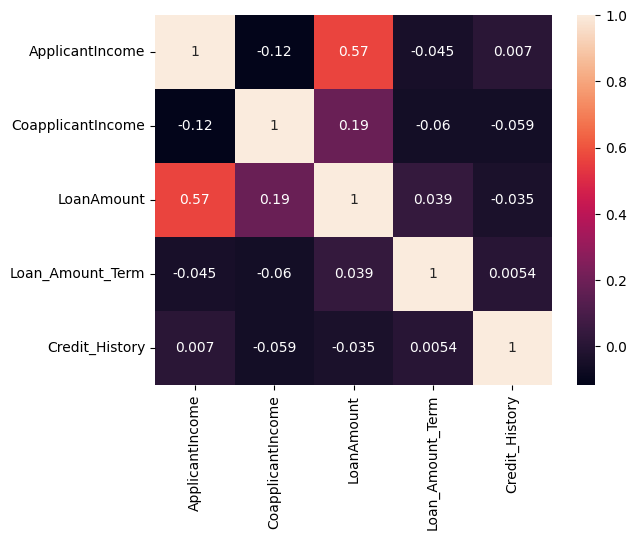

In [269]:
sns.heatmap(new_data.corr(), annot = True)
plt.show

- we can see the corr between LoanAmount and AplicantIncome feature for now we are not doing anything we will use **minmaxScaler or StandardScaler**

In [270]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# ONE HOT ENCODER OR LABEL ENCODER

In [271]:

def lebel_encoder(df):
  lb_encoder=LabelEncoder()

  for i in df:
    if df[i].dtypes == 'object':
      if df[i].nunique() == 2:
        df[i]=lb_encoder.fit_transform(df[i])
  # Applying one-hot encoding to 'Dependents' and 'Property_Area' columns
  df = pd.concat([df, pd.get_dummies(df[['Dependents', 'Property_Area']])], axis=1)

# Dropping the original categorical columns
  df.drop(['Dependents', 'Property_Area'], axis=1, inplace=True)

  return df



In [272]:
label_encoder_data=lebel_encoder(new_data)
label_encoder_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.0,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


- for the above columns we can see only 2 unique values
- so it is good to use lebel encoder for these columns

# LOGISTIC REGRESSION

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [274]:
x=label_encoder_data.drop('Loan_Status', axis=1)
y=label_encoder_data['Loan_Status']

In [275]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=123)

In [276]:
print(f"x_train{x_train.shape},\n x_test{x_test.shape},\n y_train{y_train.shape},\n y_test{y_test.shape}")

x_train(491, 16),
 x_test(123, 16),
 y_train(491,),
 y_test(123,)


In [277]:
lg_reg_pipeline = Pipeline([('scaler' , MinMaxScaler()), ('model', LogisticRegression())])

In [278]:
lg_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [279]:
y_pred=lg_reg_pipeline.predict(x_test)
x_pred=lg_reg_pipeline.predict(x_train)

In [280]:
x_test_accurecy=accuracy_score(y_test,y_pred)
print(x_test_accurecy)
x_train_accurecy=accuracy_score(y_train,x_pred)
print(x_train_accurecy)

0.7804878048780488
0.7678207739307535


# TEST DATASET

In [281]:
test=pd.read_csv('https://raw.githubusercontent.com/prashantsundge/BFSI/main/DATA/test_lAUu6dG.csv')
submission= pd.read_csv("https://raw.githubusercontent.com/prashantsundge/BFSI/main/DATA/sample_submission_49d68Cx.csv")

In [282]:
test=pre_process(test)
test=lebel_encoder(test)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [283]:
test_prediction=lg_reg_pipeline.predict(test)

In [288]:
submission['Loan_Status']=submission['Loan_Status'].replace({ 'N': 1,'Y': 0})

In [289]:
test_accuracy=accuracy_score(submission['Loan_Status'], test_prediction)
test_accuracy

0.784741144414169

In [292]:
submission['Loan_Status'] = pd.DataFrame(test_accuracy)

# sample_submission.rename(columns={'Predict_Status': 'Loan_Status'}, inplace=True)
# sample_submission['Loan_Status']=sample_submission['Loan_Status'].replace({1: 'N', 0: 'Y'})


ValueError: ignored

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('Sample_submission_1.csv', index= False)

In [ ]:
submission['Predict_Status']=test_prediction

